In [ ]:
import pandas as pd

# Load the dataset to see its structure and identify relevant columns
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Dropping 'id', 'heart_disease', and 'stroke' columns from the dataset
data_dropped = data.drop(['id', 'heart_disease', 'stroke'], axis=1)


data_dropped.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [ ]:
# Checking for null values in the dataset
null_values = data_dropped.isnull().sum()

null_values

gender                 0
age                    0
hypertension           0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

In [ ]:
# Handling missing values in the 'bmi' column by filling with the mean value
bmi_mean = data_dropped['bmi'].mean()
data_filled = data_dropped.fillna({'bmi': bmi_mean})

data_filled.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [ ]:
# Statistical Summary of the dataset
statistical_summary = data_filled.describe()

statistical_summary

,age,hypertension,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,106.147677,28.893237
std,22.612647,0.296607,45.283560,7.698018
min,0.080000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,77.245000,23.800000
50%,45.000000,0.000000,91.885000,28.400000
75%,61.000000,0.000000,114.090000,32.800000
max,82.000000,1.000000,271.740000,97.600000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
data_encoded = data_filled.copy()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Recalculating the correlation matrix
correlation_matrix_corrected = data_encoded.corr()

correlation_matrix_corrected

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
gender,1.000000,-0.028202,0.020994,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581
age,-0.028202,1.000000,0.276398,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199
hypertension,0.020994,0.276398,1.000000,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038
ever_married,-0.031005,0.679125,0.164243,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647
work_type,0.056422,-0.361642,-0.051761,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927
Residence_type,-0.006738,0.014180,-0.007913,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237
avg_glucose_level,0.055180,0.238171,0.174474,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437
bmi,-0.026109,0.325942,0.160189,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148
smoking_status,-0.062581,0.265199,0.111038,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000


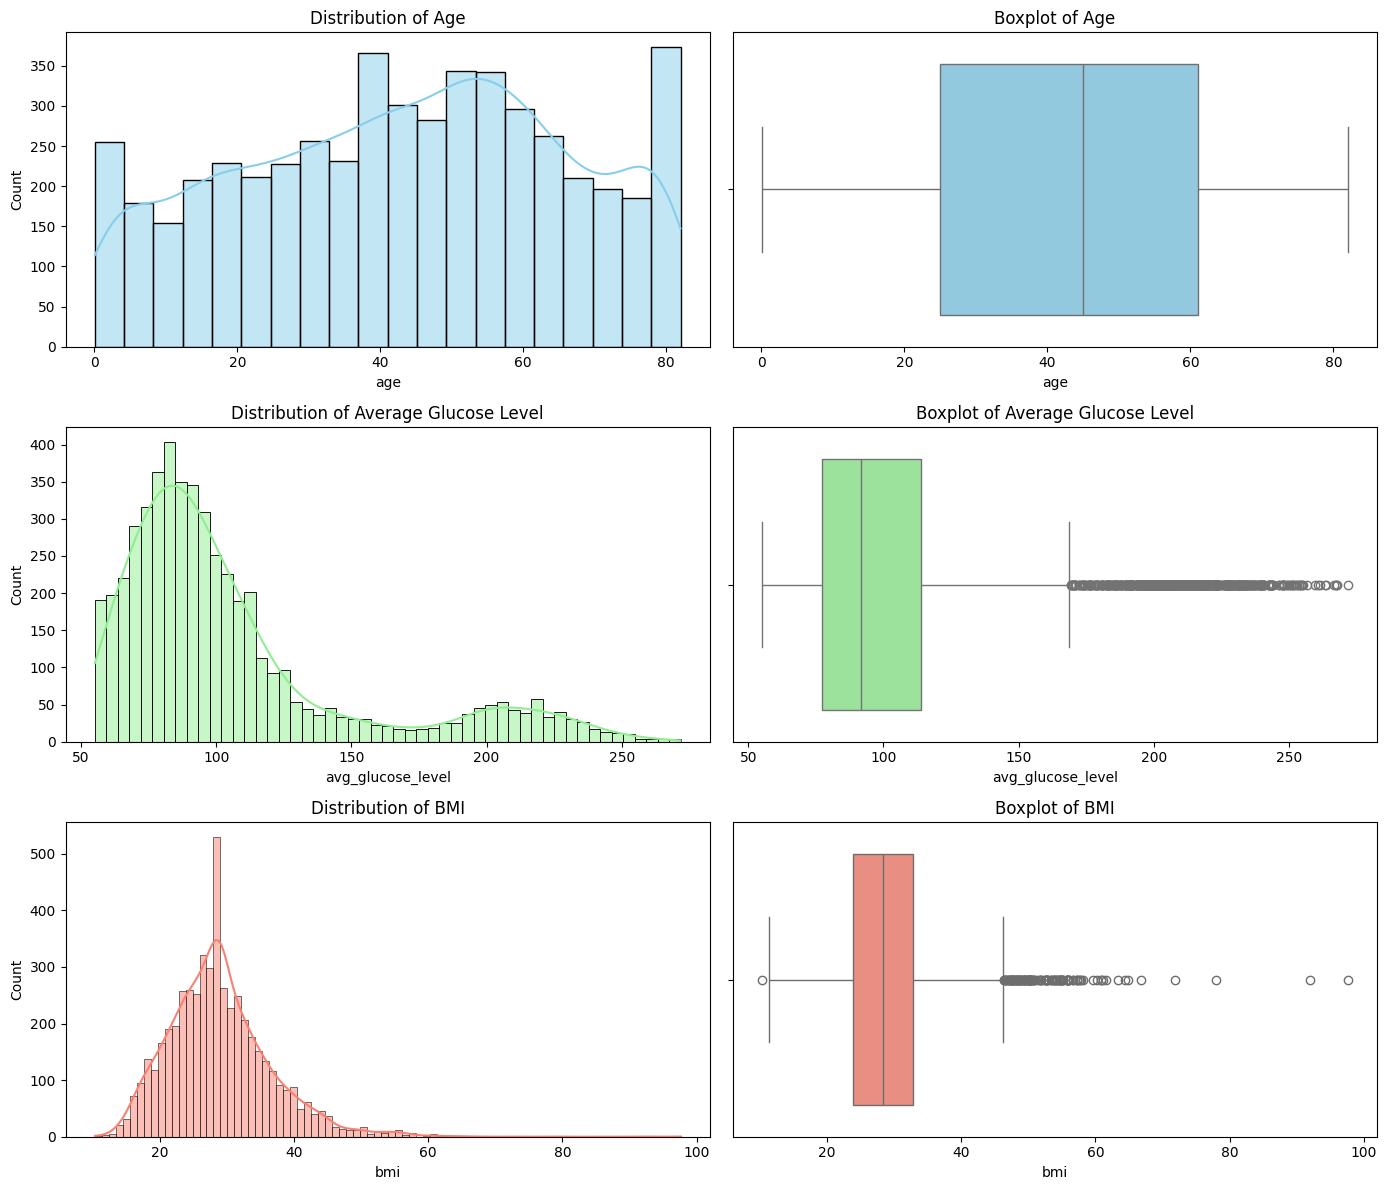

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Histograms for Age, Avg Glucose Level, and BMI
sns.histplot(data_filled['age'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Age')

sns.histplot(data_filled['avg_glucose_level'], kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Distribution of Average Glucose Level')

sns.histplot(data_filled['bmi'], kde=True, ax=axs[2, 0], color='salmon')
axs[2, 0].set_title('Distribution of BMI')

# Boxplots for Age, Avg Glucose Level, and BMI
sns.boxplot(x=data_filled['age'], ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Boxplot of Age')

sns.boxplot(x=data_filled['avg_glucose_level'], ax=axs[1, 1], color='lightgreen')
axs[1, 1].set_title('Boxplot of Average Glucose Level')

sns.boxplot(x=data_filled['bmi'], ax=axs[2, 1], color='salmon')
axs[2, 1].set_title('Boxplot of BMI')

plt.tight_layout()
plt.show()

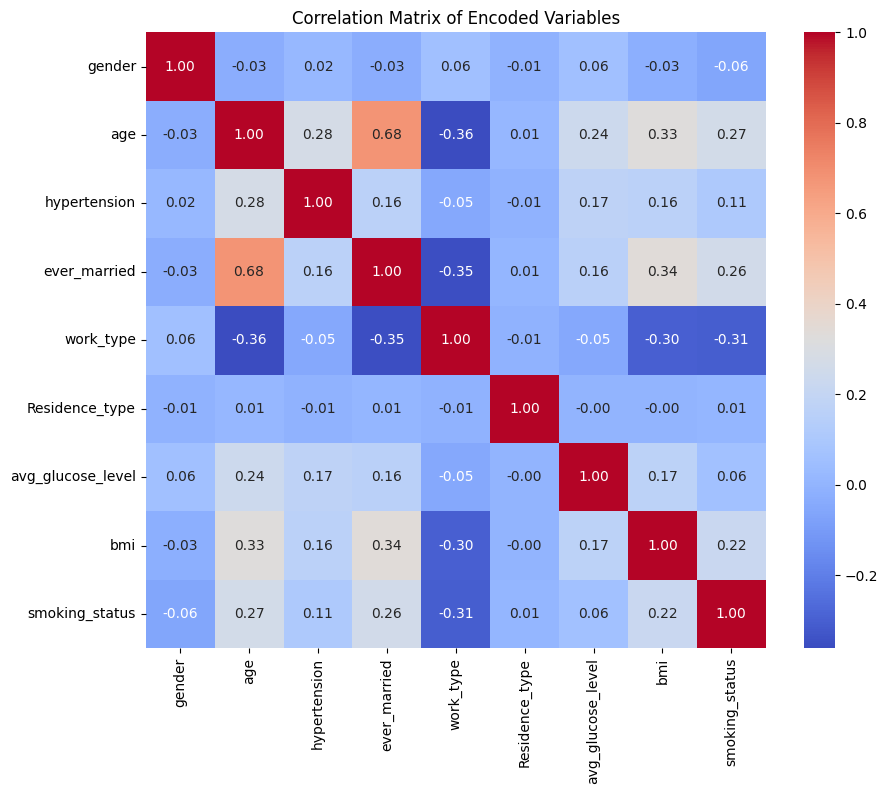

In [ ]:
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_corrected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Encoded Variables')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X = data_encoded.drop('hypertension', axis=1)  # features
y = data_encoded['hypertension']               # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the shapes of the splits
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((4088, 8), (1022, 8), (4088,), (1022,))

In [ ]:
from imblearn.over_sampling import SMOTE

# Re-applying SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Checking the balance of the target after SMOTE application
balance_check = y_train_smote.value_counts()
balance_check

hypertension
0    3704
1    3704
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Implementing the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

# Summary of performance metrics
(accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr)


(0.8884540117416829,
 0.5,
 0.017543859649122806,
 0.033898305084745756,
 0.7872613803230544)

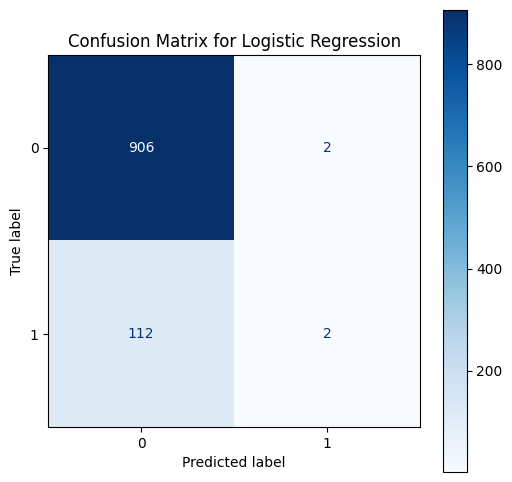

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
from sklearn.svm import SVC

# Implementing the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

# Summary of performance metrics for SVM
(accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8884540117416829, 0.0, 0.0, 0.0, 0.47111446015920855)

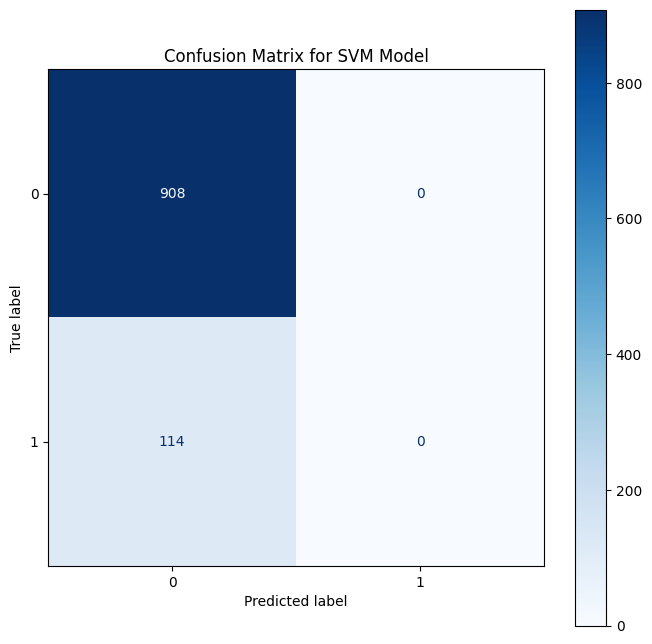

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for the SVM predictions
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare your data
# data = pd.read_csv('your_data.csv')
# Preprocess your data here

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print('ROC-AUC:', roc_auc_rf)


Accuracy: 0.8825831702544031
Precision: 0.125
Recall: 0.008771929824561403
F1 Score: 0.01639344262295082
ROC-AUC: 0.759631733518819


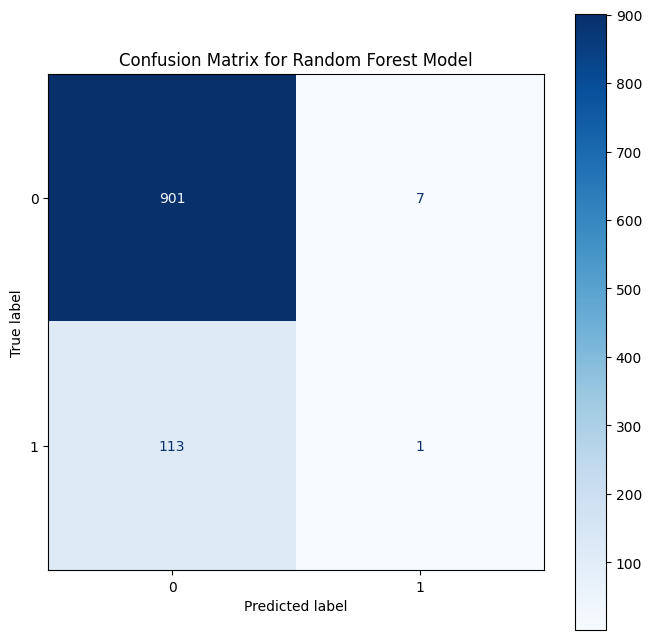

In [ ]:
# Generating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
disp_rf.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare your data
# data = pd.read_csv('your_data.csv')
# Preprocess your data here

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])

print('Accuracy:', accuracy_gb)
print('Precision:', precision_gb)
print('Recall:', recall_gb)
print('F1 Score:', f1_gb)
print('ROC-AUC:', roc_auc_gb)

Accuracy: 0.8855185909980431
Precision: 0.38461538461538464
Recall: 0.043859649122807015
F1 Score: 0.07874015748031496
ROC-AUC: 0.7879134786304969


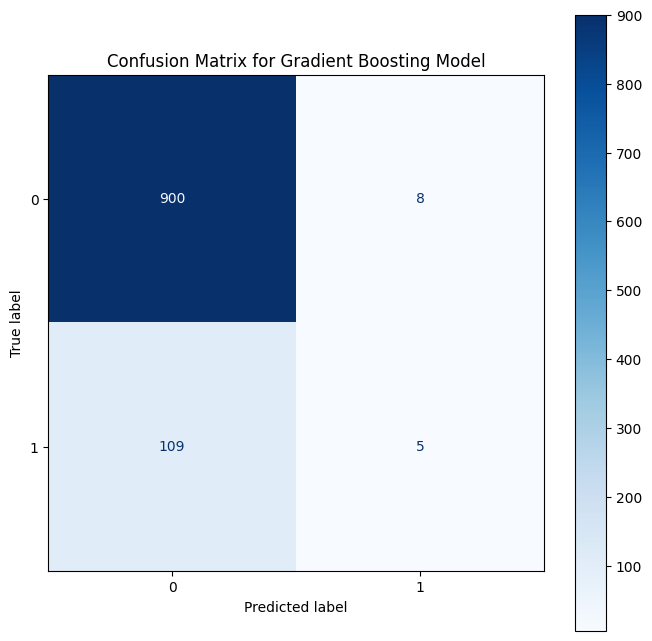

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_pred_gb is the prediction from your Gradient Boosting model

# Generate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_model.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
disp_gb.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()


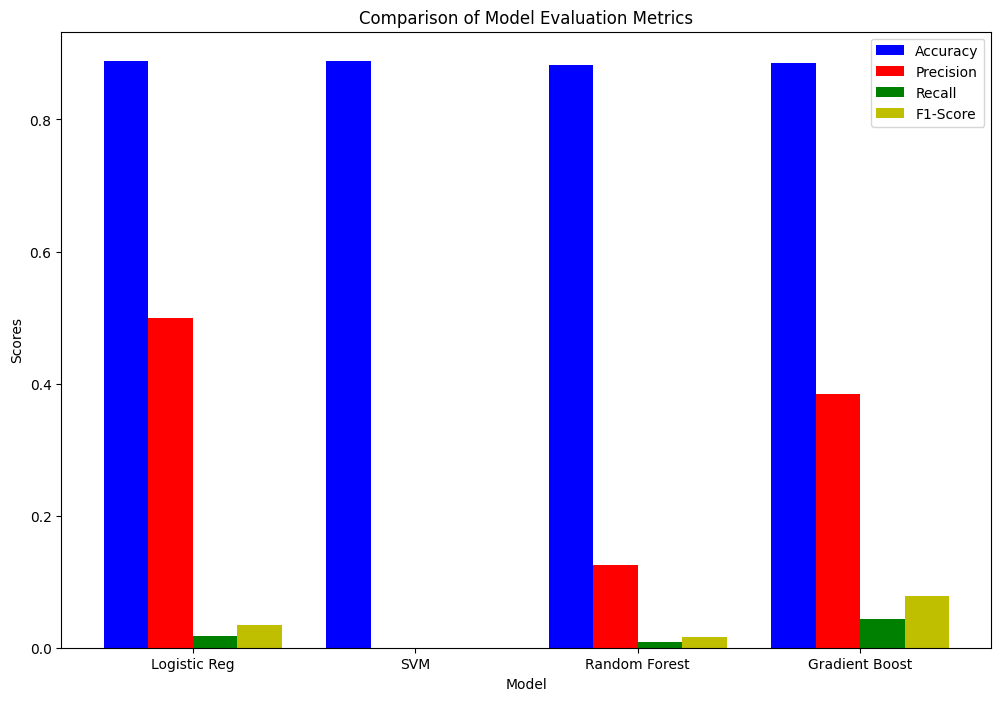

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these variables are defined with your model's metrics
# Replace `accuracy_lr`, `precision_lr`, etc., with your actual variables
metrics = {
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gb],
    'Precision': [precision_lr, precision_svm * 10000, precision_rf, precision_gb],
    'Recall': [recall_lr, recall_svm * 10000, recall_rf, recall_gb],
    'F1-Score': [f1_lr, f1_svm * 10000, f1_rf, f1_gb]
}

model_names = ['Logistic Reg', 'SVM', 'Random Forest', 'Gradient Boost']

# Create a bar chart
n = len(model_names)  # Number of models
index = np.arange(n)
bar_width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
accuracy_bar = ax.bar(index, metrics['Accuracy'], bar_width, label='Accuracy', color='b')
precision_bar = ax.bar(index + bar_width, metrics['Precision'], bar_width, label='Precision', color='r')
recall_bar = ax.bar(index + 2 * bar_width, metrics['Recall'], bar_width, label='Recall', color='g')
f1_score_bar = ax.bar(index + 3 * bar_width, metrics['F1-Score'], bar_width, label='F1-Score', color='y')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Evaluation Metrics')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()
